In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, f1_score, classification_report, precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import rcParams

In [39]:
df1=pd.read_csv("census_data_whole - Copy.csv")
df1
train = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
train

,age,worker_class,dir,dor,education,wage/hr,eieilw,marital status,ma_in_code,ma_oc_code,...,cob(father),cob(mother),cob(self),citizenship,employment,fiqfva,veteran_benefit,weeks_worked,year,target
0,73,?,0,0,High school graduate,0,?,Widowed,? or children,?,...,United-States,United-States,United-States,Native- Born in the United States,0,?,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,?,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,?,2,52,94,0
2,18,?,0,0,10th grade,0,High school,Never married,? or children,?,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,?,2,0,95,0
3,9,?,0,0,Children,0,?,Never married,? or children,?,...,United-States,United-States,United-States,Native- Born in the United States,0,?,0,0,94,0
4,10,?,0,0,Children,0,?,Never married,? or children,?,...,United-States,United-States,United-States,Native- Born in the United States,0,?,0,0,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299280,14,?,0,0,Children,0,?,Never married,? or children,?,...,United-States,United-States,United-States,Native- Born in the United States,0,?,0,0,95,0
299281,61,Private,8,36,11th grade,0,?,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,?,2,52,95,0
299282,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,?,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,?,2,52,94,0
299283,30,Private,45,2,Bachelors degree(BA AB BS),0,?,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,?,2,52,95,0


age-continuous.
	
worker_class-class of worker: Not in universe, Federal government, Local government, Never worked, Private, Self-employed-incorporated, Self-employed-not incorporated, State government, Without pay.	

dir-detailed industry recode: 0, 40, 44, 2, 43, 47, 48, 1, 11, 19, 24, 25, 32, 33, 34, 35, 36, 37, 38, 39, 4, 42, 45, 5, 15, 16, 22, 29, 31, 50, 14, 17, 18, 28, 3, 30, 41, 46, 51, 12, 13, 21, 23, 26, 6, 7, 9, 49, 27, 8, 10, 20.	

dor-detailed occupation recode: 0, 12, 31, 44, 19, 32, 10, 23, 26, 28, 29, 42, 40, 34, 14, 36, 38, 2, 20, 25, 37, 41, 27, 24, 30, 43, 33, 16, 45, 17, 35, 22, 18, 39, 3, 15, 13, 46, 8, 21, 9, 4, 6, 5, 1, 11, 7.	

education-education: Children, 7th and 8th grade, 9th grade, 10th grade, High school graduate, 11th grade, 12th grade no diploma, 5th or 6th grade, Less than 1st grade, Bachelors degree(BA AB BS), 1st 2nd 3rd or 4th grade, Some college but no degree, Masters degree(MA MS MEng MEd MSW MBA), Associates degree-occup /vocational, Associates degree-academic program, Doctorate degree(PhD EdD), Prof school degree (MD DDS DVM LLB JD).	

wage/hr-wage per hour: continuous.

eieilw-enroll in edu inst last wk: Not in universe, High school, College or university.

marital status-marital stat: Never married, Married-civilian spouse present, Married-spouse absent, Separated, Divorced, Widowed, Married-A F spouse present.

ma_in_code-major industry code: Not in universe or children, Entertainment, Social services, Agriculture, Education, Public administration, Manufacturing-durable goods, Manufacturing-nondurable goods, Wholesale trade, Retail trade, Finance insurance and real estate, Private household services, Business and repair services, Personal services except private HH, Construction, Medical except hospital, Other professional services, Transportation, Utilities and sanitary services, Mining, Communications, Hospital services, Forestry and fisheries, Armed Forces.

ma_oc_code-major occupation code: Not in universe, Professional specialty, Other service, Farming forestry and fishing, Sales, Adm support including clerical, Protective services, Handlers equip cleaners etc , Precision production craft & repair, Technicians and related support, Machine operators assmblrs & inspctrs, Transportation and material moving, Executive admin and managerial, Private household services, Armed Forces.

race-race: White, Black, Other, Amer Indian Aleut or Eskimo, Asian or Pacific Islander.

hispanic-hispanic origin: Mexican (Mexicano), Mexican-American, Puerto Rican, Central or South American, All other, Other Spanish, Chicano, Cuban, Do not know, NA.

Sex-sex: Female, Male.

mem_lab_union-member of a labor union: Not in universe, No, Yes.

unemp_reason-reason for unemployment: Not in universe, Re-entrant, Job loser - on layoff, New entrant, Job leaver, Other job loser.

em stat_f_o_p-full or part time employment stat: Children or Armed Forces, Full-time schedules, Unemployed part- time, Not in labor force, Unemployed full-time, PT for non-econ reasons usually FT, PT for econ reasons usually PT, PT for econ reasons usually FT.

cap_gain-capital gains: continuous.	

cap_loss-capital losses: continuous.

div_from_stocks-dividends from stocks: continuous.

tax_fil_stat-tax filer stat: Nonfiler, Joint one under 65 & one 65+, Joint both under 65, Single, Head of household, Joint both 65+.

reg_prev_res-region of previous residence: Not in universe, South, Northeast, West, Midwest, Abroad.

state_of_prev_res-state of previous residence: Not in universe, Utah, Michigan, North Carolina, North Dakota, Virginia, Vermont, Wyoming, West Virginia, Pennsylvania, Abroad, Oregon, California, Iowa, Florida, Arkansas, Texas, South Carolina, Arizona, Indiana, Tennessee, Maine, Alaska, Ohio, Montana, Nebraska, Mississippi, District of Columbia, Minnesota, Illinois, Kentucky, Delaware, Colorado, Maryland, Wisconsin, New Hampshire, Nevada, New York, Georgia, Oklahoma, New Mexico, South Dakota, Missouri, Kansas, Connecticut, Louisiana, Alabama, Massachusetts, Idaho, New Jersey.

fam_stats-detailed household and family stat: Child <18 never marr not in subfamily, Other Rel <18 never marr child of subfamily RP, Other Rel <18 never marr not in subfamily, Grandchild <18 never marr child of subfamily RP, Grandchild <18 never marr not in subfamily, Secondary individual, In group quarters, Child under 18 of RP of unrel subfamily, RP of unrelated subfamily, Spouse of householder, Householder, Other Rel <18 never married RP of subfamily, Grandchild <18 never marr RP of subfamily, Child <18 never marr RP of subfamily, Child <18 ever marr not in subfamily, Other Rel <18 ever marr RP of subfamily, Child <18 ever marr RP of subfamily, Nonfamily householder, Child <18 spouse of subfamily RP, Other Rel <18 spouse of subfamily RP, Other Rel <18 ever marr not in subfamily, Grandchild <18 ever marr not in subfamily, Child 18+ never marr Not in a subfamily, Grandchild 18+ never marr not in subfamily, Child 18+ ever marr RP of subfamily, Other Rel 18+ never marr not in subfamily, Child 18+ never marr RP of subfamily, Other Rel 18+ ever marr RP of subfamily, Other Rel 18+ never marr RP of subfamily, Other Rel 18+ spouse of subfamily RP, Other Rel 18+ ever marr not in subfamily, Child 18+ ever marr Not in a subfamily, Grandchild 18+ ever marr not in subfamily, Child 18+ spouse of subfamily RP, Spouse of RP of unrelated subfamily, Grandchild 18+ ever marr RP of subfamily, Grandchild 18+ never marr RP of subfamily, Grandchild 18+ spouse of subfamily RP.

house_summary-detailed household summary in household: Child under 18 never married, Other relative of householder, Nonrelative of householder, Spouse of householder, Householder, Child under 18 ever married, Group Quarters- Secondary individual, Child 18 or older.
	
instance_weight-instance weight: continuous.
	
mc_cim-migration code-change in msa: Not in universe, Nonmover, MSA to MSA, NonMSA to nonMSA, MSA to nonMSA, NonMSA to MSA, Abroad to MSA, Not identifiable, Abroad to nonMSA.
	
mc_cir-migration code-change in reg: Not in universe, Nonmover, Same county, Different county same state, Different state same division, Abroad, Different region, Different division same region.
	
mc_mwr-migration code-move within reg: Not in universe, Nonmover, Same county, Different county same state, Different state in West, Abroad, Different state in Midwest, Different state in South, Different state in Northeast.
	
lived_in house_1 year ago-live in this house 1 year ago: Not in universe under 1 year old, Yes, No.
	
mpris-migration prev res in sunbelt: Not in universe, Yes, No.
	
npwfe-num persons worked for employer: continuous.
	
Fam_under_18-family members under 18: Both parents present, Neither parent present, Mother only present, Father only present, Not in universe.
	
cob(father)-country of birth father: Mexico, United-States, Puerto-Rico, Dominican-Republic, Jamaica, Cuba, Portugal, Nicaragua, Peru, Ecuador, Guatemala, Philippines, Canada, Columbia, El-Salvador, Japan, England, Trinadad&Tobago, Honduras, Germany, Taiwan, Outlying-U S (Guam USVI etc), India, Vietnam, China, Hong Kong, Cambodia, France, Laos, Haiti, South Korea, Iran, Greece, Italy, Poland, Thailand, Yugoslavia, Holand-Netherlands, Ireland, Scotland, Hungary, Panama.
	
cob(mother)-country of birth mother: India, Mexico, United-States, Puerto-Rico, Dominican-Republic, England, Honduras, Peru, Guatemala, Columbia, El-Salvador, Philippines, France, Ecuador, Nicaragua, Cuba, Outlying-U S (Guam USVI etc), Jamaica, South Korea, China, Germany, Yugoslavia, Canada, Vietnam, Japan, Cambodia, Ireland, Laos, Haiti, Portugal, Taiwan, Holand-Netherlands, Greece, Italy, Poland, Thailand, Trinadad&Tobago, Hungary, Panama, Hong Kong, Scotland, Iran.
	
cob(self)-country of birth self: United-States, Mexico, Puerto-Rico, Peru, Canada, South Korea, India, Japan, Haiti, El-Salvador, Dominican-Republic, Portugal, Columbia, England, Thailand, Cuba, Laos, Panama, China, Germany, Vietnam, Italy, Honduras, Outlying-U S (Guam USVI etc), Hungary, Philippines, Poland, Ecuador, Iran, Guatemala, Holand-Netherlands, Taiwan, Nicaragua, France, Jamaica, Scotland, Yugoslavia, Hong Kong, Trinadad&Tobago, Greece, Cambodia, Ireland.
	
citizenship-citizenship: Native- Born in the United States, Foreign born- Not a citizen of U S , Native- Born in Puerto Rico or U S Outlying, Native- Born abroad of American Parent(s), Foreign born- U S citizen by naturalization.
	
employment-own business or self employed: 0, 2, 1.
	
fiqfva-fill inc questionnaire for veteran's admin: Not in universe, Yes, No.

veteran_benefit-veterans benefits: 0, 2, 1.
	
weeks_worked-weeks worked in year: continuous.
	
year-year: 94, 95.
	
target->50k(0) or <50k(1)



In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299285 entries, 0 to 299284
Data columns (total 42 columns):
age                          299285 non-null int64
worker_class                 299285 non-null object
dir                          299285 non-null int64
dor                          299285 non-null int64
education                    299285 non-null object
wage/hr                      299285 non-null int64
eieilw                       299285 non-null object
marital status               299285 non-null object
ma_in_code                   299285 non-null object
ma_oc_code                   299285 non-null object
race                         299285 non-null object
hispanic                     299285 non-null object
Sex                          299285 non-null object
mem_lab_union                299285 non-null object
unemp_reason                 299285 non-null object
em stat_f_o_p                299285 non-null object
cap_gain                     299285 non-null int64
cap_loss  

In [41]:
train.describe()

,age,dir,dor,wage/hr,cap_gain,cap_loss,div_from_stocks,instance_weight,npwfe,employment,veteran_benefit,weeks_worked,year,target
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,15.345818,11.314743,55.105027,431.742176,36.849010,195.851259,1740.101125,1.956172,0.176461,1.516498,23.178375,94.499998,0.062041
std,22.318468,18.053638,14.455980,273.340729,4670.768536,269.789771,1937.847082,994.144299,2.364857,0.555240,0.850395,24.404016,0.500001,0.241231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.490000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1617.110000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2188.110000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [42]:
train.replace(['Not in universe','?','Not in universe or children','Do not know',
                    'Not in universe under 1 year old','NA','? or children'],np.nan, inplace=True)

In [43]:
#type(df1)
train.shape

(299285, 42)

In [44]:
#Calculating the missing ratio
df1_na = (train.isnull().sum() / len(train)) * 100
df1_na = df1_na.drop(df1_na[df1_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df1_na})
missing_data.head(30)

,Missing Ratio
fiqfva,98.993936
unemp_reason,96.926007
eieilw,93.678935
state_of_prev_res,92.505806
mpris,92.158979
reg_prev_res,92.158979
mem_lab_union,90.462937
Fam_under_18,72.381175
mc_mwr,50.747949
mc_cir,50.747949


Text(0.5, 1.0, 'Percent missing data by feature')

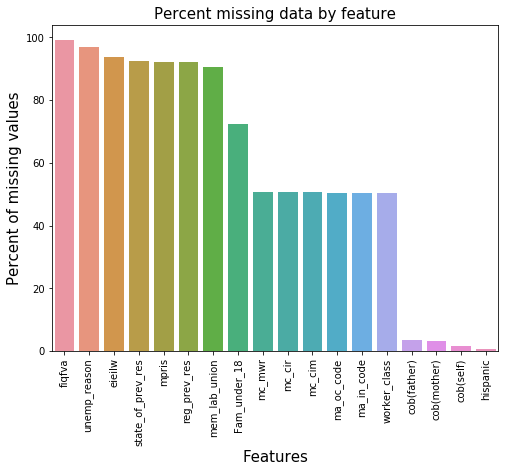

In [45]:

f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index.values, y=missing_data["Missing Ratio"])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [46]:
"""
Since one cannot impute columns which have more than 50% missing values  
"""
train.drop(missing_data[missing_data['Missing Ratio']>50].index,axis=1,inplace=True)


In [47]:
train.shape

(299285, 28)

In [48]:
# find number of missing values in cloumns
train.isnull().sum()


age                              0
dir                              0
dor                              0
education                        0
wage/hr                          0
marital status                   0
race                             0
hispanic                      1725
Sex                              0
em stat_f_o_p                    0
cap_gain                         0
cap_loss                         0
div_from_stocks                  0
tax_fil_stat                     0
fam_stats                        0
house_summary                    0
instance_weight                  0
lived_in house_1 year ago        0
npwfe                            0
cob(father)                  10142
cob(mother)                   9191
cob(self)                     5157
citizenship                      0
employment                       0
veteran_benefit                  0
weeks_worked                     0
year                             0
target                           0
dtype: int64

In [49]:

train.columns.values

array(['age', 'dir', 'dor', 'education', 'wage/hr', 'marital status',
       'race', 'hispanic', 'Sex', 'em stat_f_o_p', 'cap_gain', 'cap_loss',
       'div_from_stocks', 'tax_fil_stat', 'fam_stats', 'house_summary',
       'instance_weight', 'lived_in house_1 year ago', 'npwfe',
       'cob(father)', 'cob(mother)', 'cob(self)', 'citizenship',
       'employment', 'veteran_benefit', 'weeks_worked', 'year', 'target'],
      dtype=object)

In [50]:
train.columns[train.isnull().any()].tolist()

['hispanic', 'cob(father)', 'cob(mother)', 'cob(self)']

In [51]:
for column in ['hispanic', 'cob(father)', 'cob(mother)', 'cob(self)']:
    train[column].fillna(train[column].mode()[0], inplace=True)

In [52]:

train.isnull().any().sum()

0

In [53]:
train.shape

(299285, 28)

In [54]:
train.columns.values

array(['age', 'dir', 'dor', 'education', 'wage/hr', 'marital status',
       'race', 'hispanic', 'Sex', 'em stat_f_o_p', 'cap_gain', 'cap_loss',
       'div_from_stocks', 'tax_fil_stat', 'fam_stats', 'house_summary',
       'instance_weight', 'lived_in house_1 year ago', 'npwfe',
       'cob(father)', 'cob(mother)', 'cob(self)', 'citizenship',
       'employment', 'veteran_benefit', 'weeks_worked', 'year', 'target'],
      dtype=object)

# Dealing with outliers

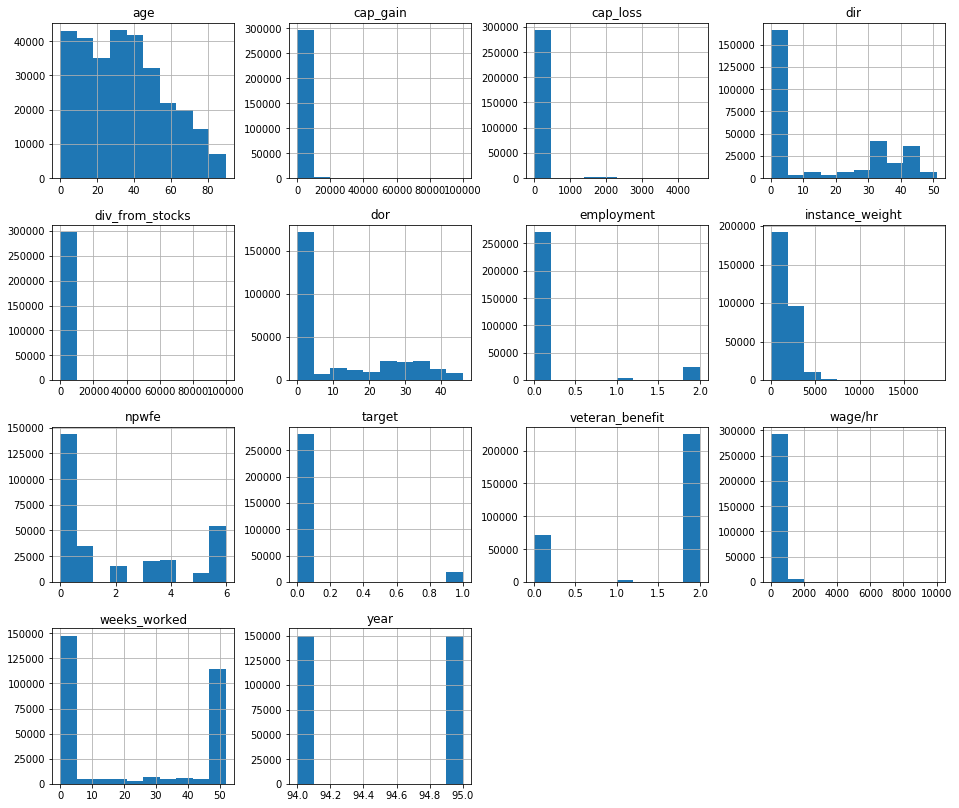

In [55]:
train.hist(figsize=(16,14));

From the histograms above, I can infer the following:

For Capital Gain and Capital Loss the data is highly left skewed which needs to be tackled.
Instance Weight is also left skewed.
The week hours seems to be right skewed

People who have large Capital Gain  have Income more than 50K compared to Capital Loss 

In [56]:

"""
Since we can see the capital_losses , capital_gains , dividends are such columns in which most of the value are 0 and only some % of data has a value in it
we can convert it into a categorical feature where if there is a value >0 we assign it 1 else keep it as zero
"""
train["capi_gain"]= np.where(train['cap_gain']>0,1, 0)
train["capi_gain"].unique()
train["capi_loss"]= np.where(train['cap_loss']>0,1, 0)
train["capi_loss"].unique()
train["dividend"]= np.where(train['div_from_stocks']>0,1, 0)
train["dividend"].unique()

array([0, 1], dtype=int64)

In [57]:
train["target"].unique()

array([0, 1], dtype=int64)

In [58]:
rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,dir,dor,wage/hr,cap_gain,cap_loss,div_from_stocks,instance_weight,npwfe,employment,veteran_benefit,weeks_worked,year,target,capi_gain,capi_loss,dividend
age,1,0.155509,0.114987,0.0354461,0.0529211,0.0622784,0.106277,-0.000931211,0.137888,-0.00219738,0.673858,0.202895,0.00281643,0.136313,0.122592,0.0602454,0.235595
dir,0.155509,1,0.563731,0.165086,0.0663149,0.0713096,0.0136186,0.0302305,0.641705,0.25461,0.475122,0.754048,0.00368271,0.195699,0.0901357,0.0748932,0.133725
dor,0.114987,0.563731,1,0.195306,0.0045106,0.0429694,-0.0272862,0.0286024,0.516091,0.229978,0.437789,0.655575,-0.00165671,0.0137484,0.0434739,0.0473217,-0.00236441
wage/hr,0.0354461,0.165086,0.195306,1,0.00203924,0.0129286,-0.00702004,0.0144423,0.190642,0.0564608,0.11268,0.195415,0.00224976,0.023119,0.0176588,0.014732,0.0229546
cap_gain,0.0529211,0.0663149,0.0045106,0.00203924,1,-0.0126252,0.125013,0.00442319,0.0595293,0.0149807,0.0513113,0.0840467,0.00540323,0.240382,0.470967,-0.0130104,0.102796
cap_loss,0.0622784,0.0713096,0.0429694,0.0129286,-0.0126252,1,0.042531,0.0069011,0.0829649,0.0243755,0.0749923,0.100002,-0.0003995,0.147448,-0.0268069,0.97039,0.0683007
div_from_stocks,0.106277,0.0136186,-0.0272862,-0.00702004,0.125013,0.042531,1,-6.73951e-06,0.00669762,-0.00484624,0.0551062,0.0138272,0.00355961,0.178462,0.0786042,0.0372647,0.293796
instance_weight,-0.000931211,0.0302305,0.0286024,0.0144423,0.00442319,0.0069011,-6.73951e-06,1,0.0449097,0.0154959,0.0408413,0.0301414,0.0115115,0.0129932,0.00384254,0.00768455,0.00495022
npwfe,0.137888,0.641705,0.516091,0.190642,0.0595293,0.0829649,0.00669762,0.0449097,1,0.241256,0.462131,0.747194,0.0196435,0.224148,0.103646,0.0881291,0.149231
employment,-0.00219738,0.25461,0.229978,0.0564608,0.0149807,0.0243755,-0.00484624,0.0154959,0.241256,1,0.177447,0.267358,0.0084861,0.0413227,0.0279292,0.0258145,0.0289475


#Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also,instance Weight has almost zero correlation with the output class and hence, I'll drop this column later.

I'll now analyse the categorical features using CountPlot.



# Work class

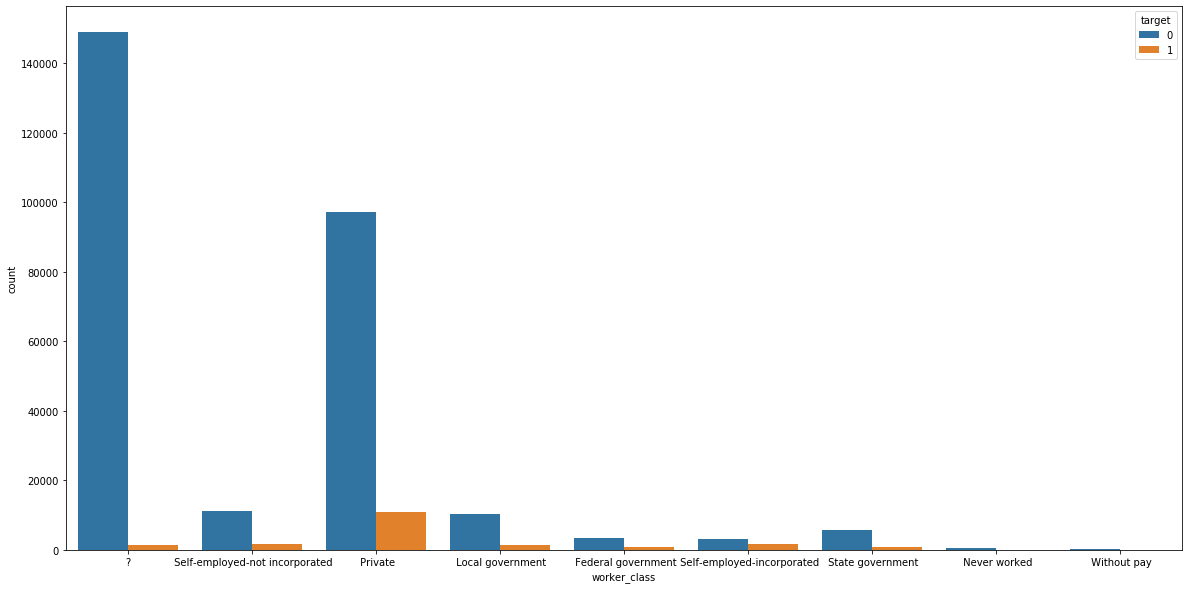

In [59]:

plt.figure(figsize=(20,10))
sns.countplot(x = 'worker_class', hue = 'target', data = df1)

#Here we notice people with more number of people with private jobs seems
to have income less than 50k

# Education

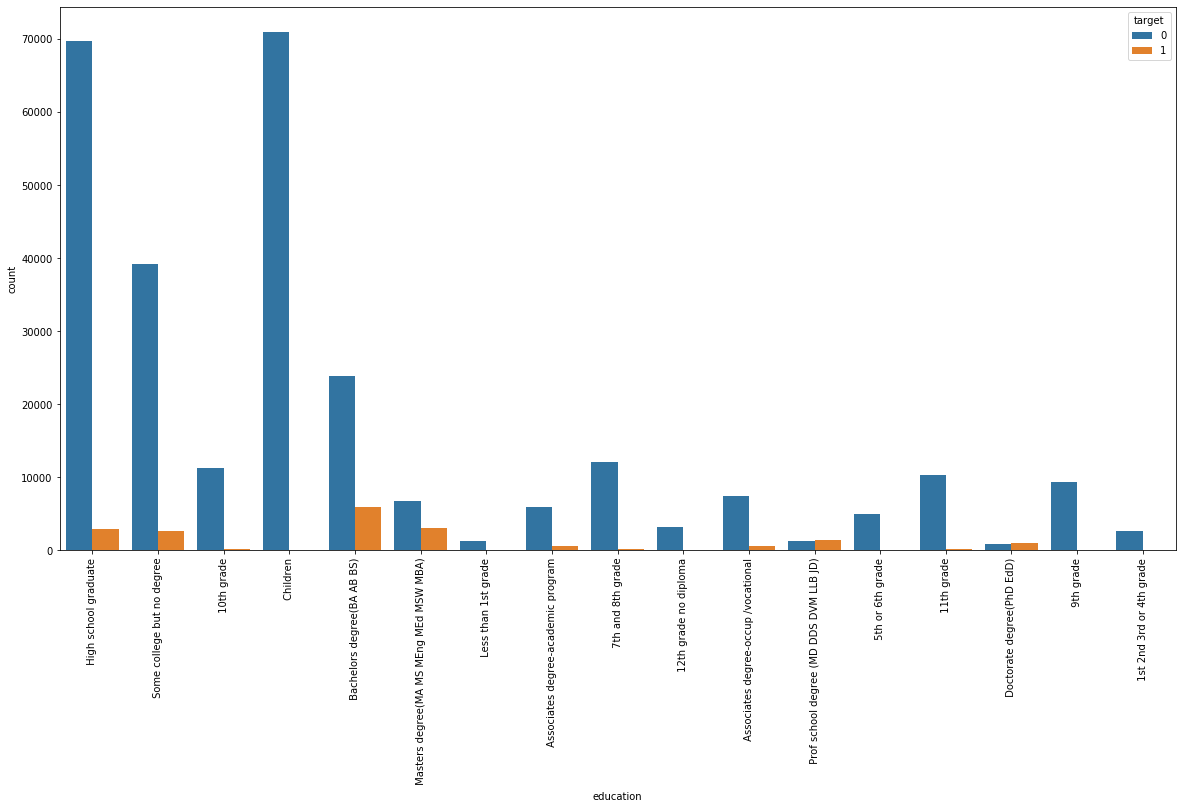

In [60]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'education', hue = 'target', data = df1)

#Here its seems the highschool graduate person followed by person yet to graduate, seems to have almost no income source 
#which is eminent from the graph 

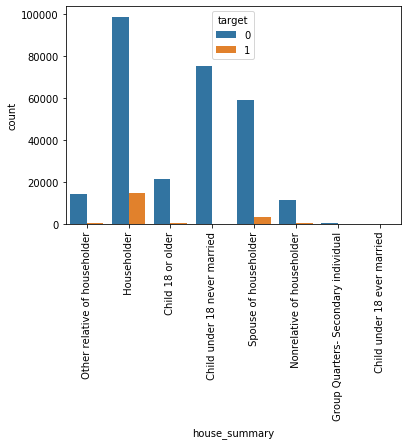

In [61]:
plt.xticks(rotation = 90)
sns.countplot(x = 'house_summary', hue = 'target', data = df1)

Lets take a look at 'worker_class'
 Private                           258423
Self-employed-not incorporated     12725
Local government                   11617
State government                    6394
Self-employed-incorporated          4913
Federal government                  4330
Never worked                         643
Without pay                          240
Name: worker_class, dtype: int64


Lets take a look at the same graphically 


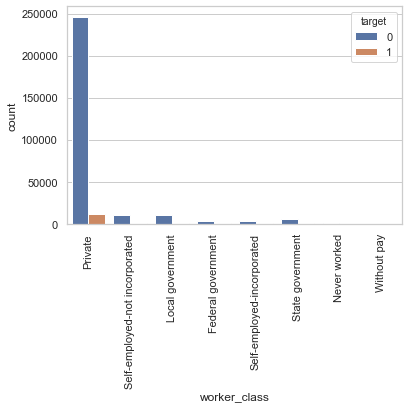

Lets take a look at 'education'
 High school graduate                      72554
Children                                  70864
Some college but no degree                41774
Bachelors degree(BA AB BS)                29750
7th and 8th grade                         12156
10th grade                                11370
11th grade                                10399
Masters degree(MA MS MEng MEd MSW MBA)     9847
9th grade                                  9335
Associates degree-occup /vocational        8048
Associates degree-academic program         6442
5th or 6th grade                           4991
12th grade no diploma                      3263
1st 2nd 3rd or 4th grade                   2705
Prof school degree (MD DDS DVM LLB JD)     2669
Doctorate degree(PhD EdD)                  1883
Less than 1st grade                        1235
Name: education, dtype: int64


Lets take a look at the same graphically 


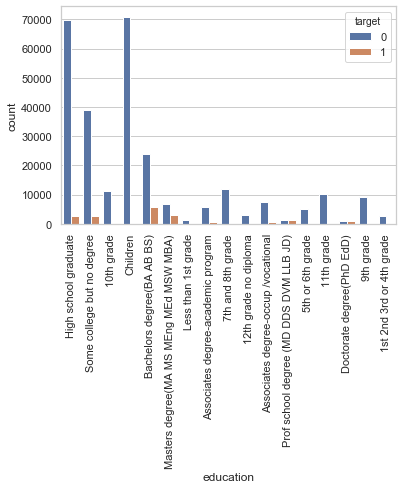

Lets take a look at 'eieilw'
 High school              290765
College or university      8520
Name: eieilw, dtype: int64


Lets take a look at the same graphically 


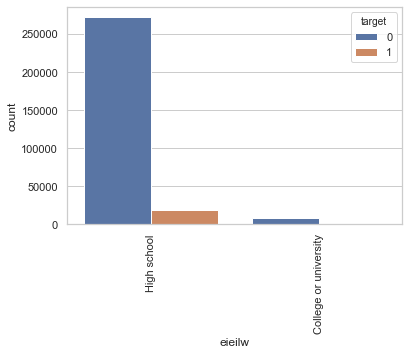

Lets take a look at 'marital status'
 Never married                      129628
Married-civilian spouse present    126315
Divorced                            19160
Widowed                             15788
Separated                            5156
Married-spouse absent                2234
Married-A F spouse present           1004
Name: marital status, dtype: int64


Lets take a look at the same graphically 


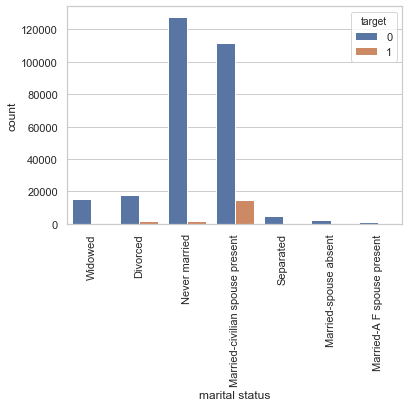

Lets take a look at 'ma_in_code'
 Retail trade                           176749
Manufacturing-durable goods             13460
Education                               12510
Manufacturing-nondurable goods          10291
Finance insurance and real estate        9164
Construction                             9051
Business and repair services             8636
Medical except hospital                  6987
Public administration                    6788
Other professional services              6686
Transportation                           6420
Hospital services                        5815
Wholesale trade                          5418
Agriculture                              4481
Personal services except private HH      4393
Social services                          3771
Entertainment                            2472
Communications                           1776
Utilities and sanitary services          1748
Private household services               1440
Mining                                    888


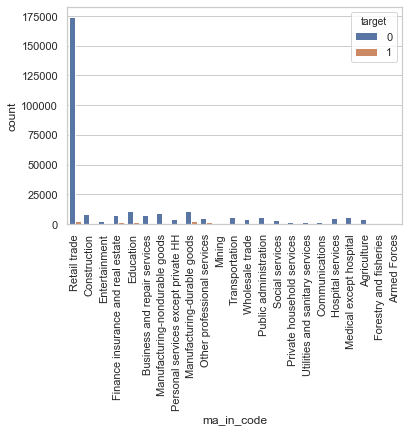

Lets take a look at 'ma_oc_code'
 Adm support including clerical           173056
Professional specialty                    20809
Executive admin and managerial            18783
Other service                             18276
Sales                                     17804
Precision production craft & repair       15872
Machine operators assmblrs & inspctrs      9565
Handlers equip cleaners etc                6198
Transportation and material moving         6060
Farming forestry and fishing               4666
Technicians and related support            4490
Protective services                        2448
Private household services                 1206
Armed Forces                                 52
Name: ma_oc_code, dtype: int64


Lets take a look at the same graphically 


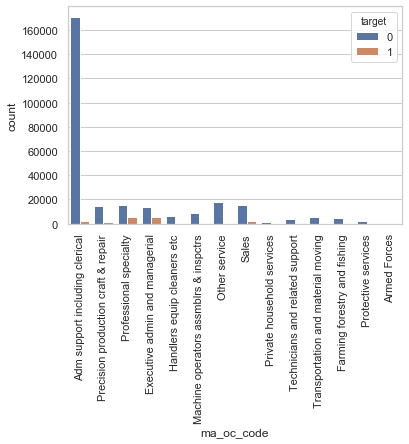

Lets take a look at 'race'
 White                          250978
Black                           30539
Asian or Pacific Islander        8748
Other                            5560
Amer Indian Aleut or Eskimo      3460
Name: race, dtype: int64


Lets take a look at the same graphically 


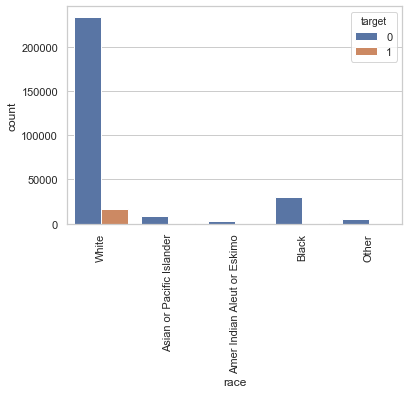

Lets take a look at 'hispanic'
 All other                    259555
Mexican-American              12080
Mexican (Mexicano)            10929
Central or South American      5882
Puerto Rican                   4895
Other Spanish                  3728
Cuban                          1742
Chicano                         474
Name: hispanic, dtype: int64


Lets take a look at the same graphically 


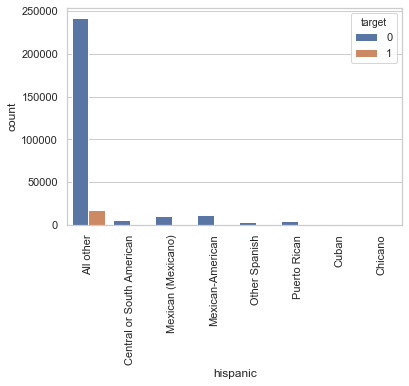

Lets take a look at 'Sex'
 Female    155775
Male      143510
Name: Sex, dtype: int64


Lets take a look at the same graphically 


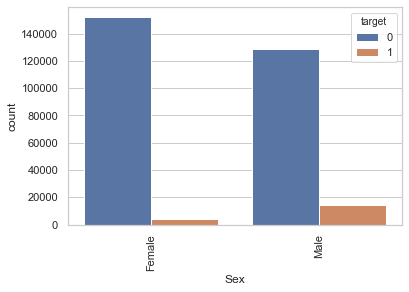

Lets take a look at 'mem_lab_union'
 No     294810
Yes      4475
Name: mem_lab_union, dtype: int64


Lets take a look at the same graphically 


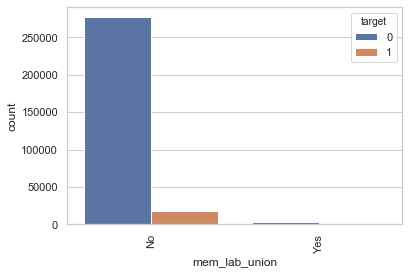

Lets take a look at 'unemp_reason'
 Other job loser          293231
Re-entrant                 3043
Job loser - on layoff      1484
Job leaver                  884
New entrant                 643
Name: unemp_reason, dtype: int64


Lets take a look at the same graphically 


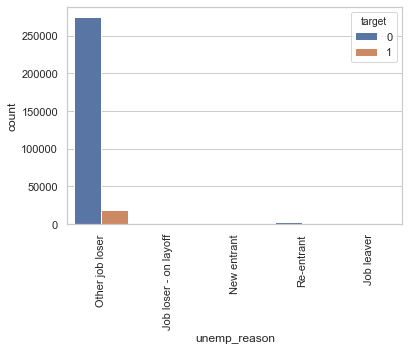

Lets take a look at 'em stat_f_o_p'
 Children or Armed Forces              185459
Full-time schedules                    61203
Not in labor force                     40221
PT for non-econ reasons usually FT      5057
Unemployed full-time                    3516
PT for econ reasons usually PT          1792
Unemployed part- time                   1254
PT for econ reasons usually FT           783
Name: em stat_f_o_p, dtype: int64


Lets take a look at the same graphically 


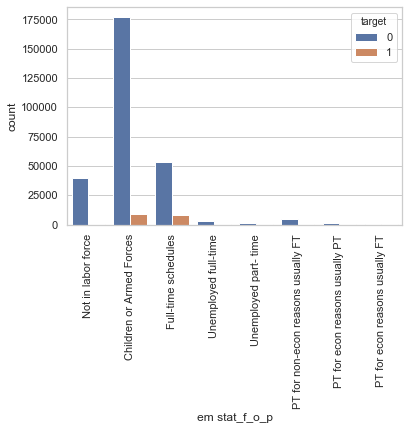

Lets take a look at 'tax_fil_stat'
 Nonfiler                        112462
Joint both under 65             100955
Single                           56315
Joint both 65+                   12526
Head of household                11183
Joint one under 65 & one 65+      5844
Name: tax_fil_stat, dtype: int64


Lets take a look at the same graphically 


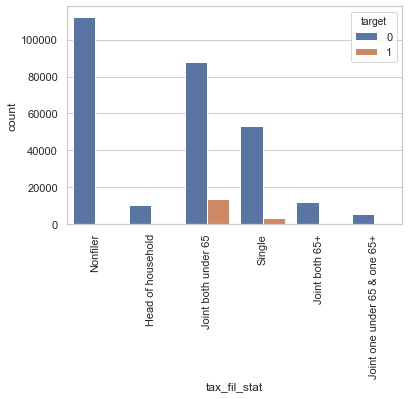

Lets take a look at 'reg_prev_res'
 South        283132
West           6120
Midwest        5273
Northeast      4027
Abroad          733
Name: reg_prev_res, dtype: int64


Lets take a look at the same graphically 


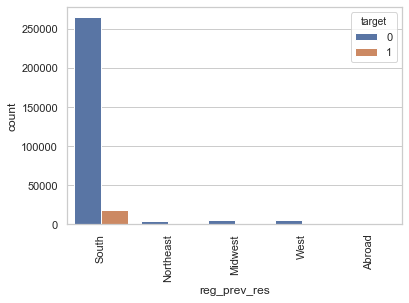

Lets take a look at 'state_of_prev_res'
 California              279454
Utah                      1597
Florida                   1299
North Carolina            1210
Abroad                     936
Oklahoma                   922
Minnesota                  869
Indiana                    830
North Dakota               725
New Mexico                 691
Michigan                   640
Alaska                     414
Arizona                    380
New Hampshire              358
Kentucky                   358
Colorado                   353
Oregon                     346
Wyoming                    344
Georgia                    338
West Virginia              334
Montana                    333
Alabama                    324
Ohio                       311
Louisiana                  311
Arkansas                   305
Texas                      304
New York                   302
Pennsylvania               298
Tennessee                  297
Vermont                    290
Mississippi                28

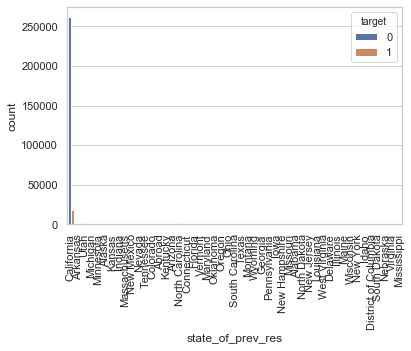

Lets take a look at 'fam_stats'
 Householder                                        79939
Child <18 never marr not in subfamily              75316
Spouse of householder                              62350
Nonfamily householder                              33456
Child 18+ never marr Not in a subfamily            18164
Secondary individual                                9278
Other Rel 18+ ever marr not in subfamily            2977
Grandchild <18 never marr child of subfamily RP     2757
Other Rel 18+ never marr not in subfamily           2562
Grandchild <18 never marr not in subfamily          1568
Child 18+ ever marr Not in a subfamily              1478
Child under 18 of RP of unrel subfamily             1085
Child 18+ ever marr RP of subfamily                 1025
RP of unrelated subfamily                           1025
Other Rel 18+ spouse of subfamily RP                 992
Other Rel 18+ ever marr RP of subfamily              966
Other Rel <18 never marr child of subfamily RP       95

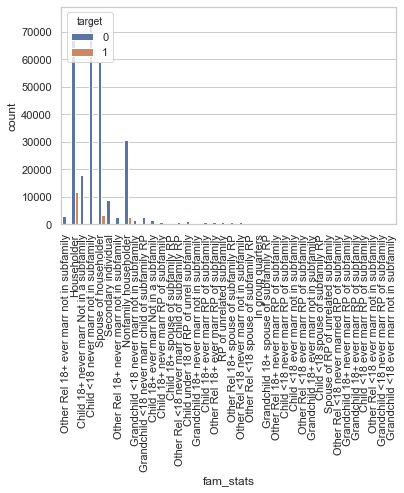

Lets take a look at 'house_summary'
 Householder                             113418
Child under 18 never married             75465
Spouse of householder                    62366
Child 18 or older                        21769
Other relative of householder            14533
Nonrelative of householder               11478
Group Quarters- Secondary individual       187
Child under 18 ever married                 69
Name: house_summary, dtype: int64


Lets take a look at the same graphically 


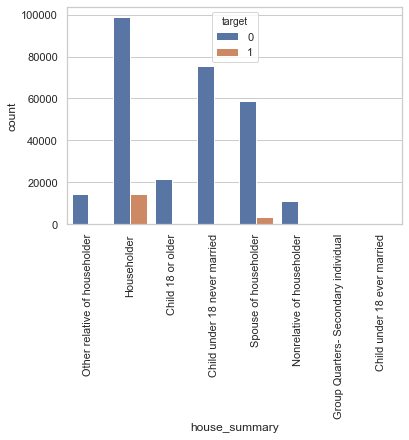

Lets take a look at 'mc_cim'
 Nonmover            275818
MSA to MSA           15890
NonMSA to nonMSA      4155
MSA to nonMSA         1154
NonMSA to MSA          910
Not identifiable       630
Abroad to MSA          619
Abroad to nonMSA       109
Name: mc_cim, dtype: int64


Lets take a look at the same graphically 


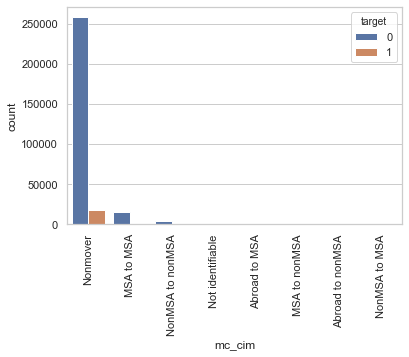

Lets take a look at 'mc_cir'
 Nonmover                          275818
Same county                        14691
Different county same state         4126
Different region                    1761
Different state same division       1465
Abroad                               733
Different division same region       691
Name: mc_cir, dtype: int64


Lets take a look at the same graphically 


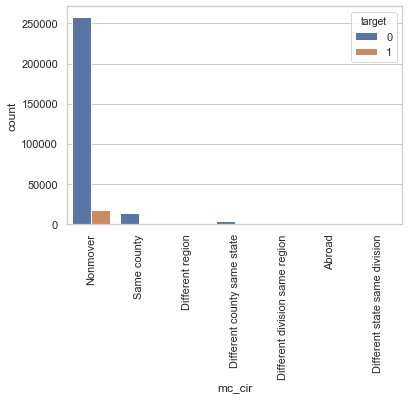

Lets take a look at 'mc_mwr'
 Nonmover                        275818
Same county                      14691
Different county same state       4126
Different state in South          1448
Different state in West           1037
Different state in Midwest         793
Abroad                             733
Different state in Northeast       639
Name: mc_mwr, dtype: int64


Lets take a look at the same graphically 


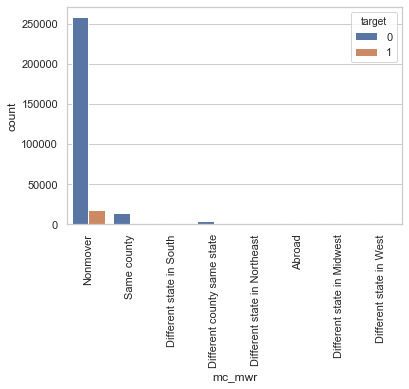

Lets take a look at 'lived_in house_1 year ago'
 ? under 1 year old    151881
Yes                   123937
No                     23467
Name: lived_in house_1 year ago, dtype: int64


Lets take a look at the same graphically 


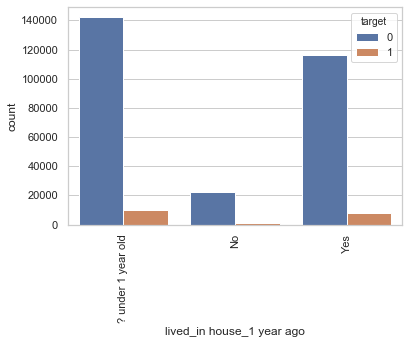

Lets take a look at 'mpris'
 No     290616
Yes      8669
Name: mpris, dtype: int64


Lets take a look at the same graphically 


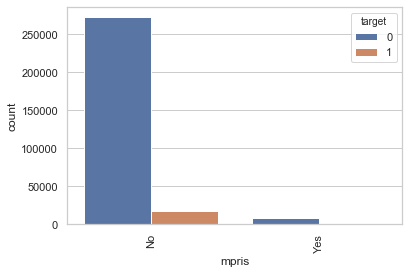

Lets take a look at 'Fam_under_18'
 Both parents present      274968
Mother only present        19029
Father only present         2827
Neither parent present      2461
Name: Fam_under_18, dtype: int64


Lets take a look at the same graphically 


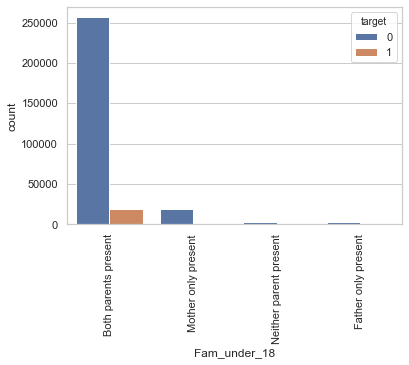

Lets take a look at 'cob(father)'
 United-States                   248673
Mexico                           15056
Puerto-Rico                       3968
Italy                             3331
Canada                            2040
Germany                           2004
Dominican-Republic                1971
Poland                            1841
Philippines                       1745
Cuba                              1713
El-Salvador                       1484
China                             1252
England                           1174
Columbia                           904
India                              887
Ireland                            815
South Korea                        786
Jamaica                            714
Guatemala                          677
Vietnam                            675
Japan                              601
Portugal                           585
Ecuador                            573
Greece                             550
Haiti                        

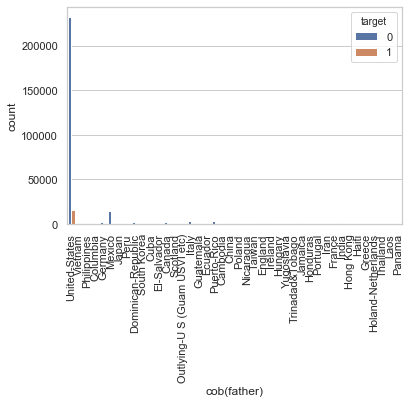

Lets take a look at 'cob(mother)'
 United-States                   249683
Mexico                           14768
Puerto-Rico                       3666
Italy                             2761
Canada                            2153
Germany                           2058
Philippines                       1876
Cuba                              1704
Poland                            1695
El-Salvador                       1642
Dominican-Republic                1641
England                           1330
China                             1128
Ireland                            937
South Korea                        906
Columbia                           901
India                              894
Japan                              734
Vietnam                            710
Jamaica                            704
Guatemala                          674
Ecuador                            576
Portugal                           522
Peru                               522
Haiti                        

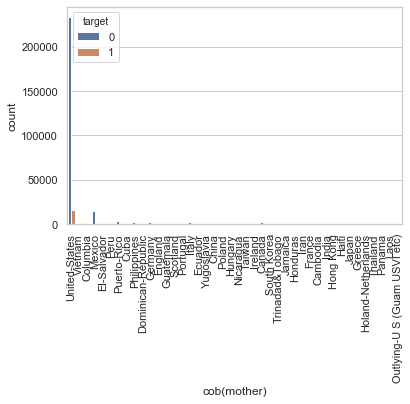

Lets take a look at 'cob(self)'
 United-States                   270499
Mexico                            8703
Puerto-Rico                       2092
Philippines                       1299
Germany                           1271
Cuba                              1265
Canada                            1046
El-Salvador                       1032
Dominican-Republic                1017
China                              715
South Korea                        707
England                            682
Columbia                           645
Italy                              645
India                              626
Vietnam                            573
Poland                             552
Japan                              517
Guatemala                          512
Jamaica                            496
Ecuador                            392
Peru                               389
Nicaragua                          348
Haiti                              327
Taiwan                         

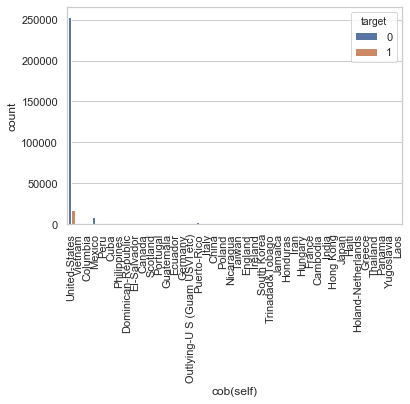

Lets take a look at 'citizenship'
 Native- Born in the United States              265347
Foreign born- Not a citizen of U S              20107
Foreign born- U S citizen by naturalization      8867
Native- Born abroad of American Parent(s)        2707
Native- Born in Puerto Rico or U S Outlying      2257
Name: citizenship, dtype: int64


Lets take a look at the same graphically 


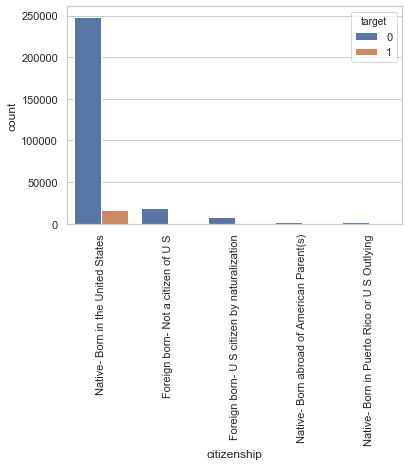

Lets take a look at 'fiqfva'
 No     298695
Yes       590
Name: fiqfva, dtype: int64


Lets take a look at the same graphically 


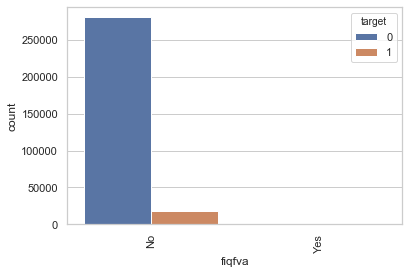

In [161]:
train_object=train.select_dtypes(include=['object'])

for i in train_object.columns:
    print("Lets take a look at '"+str(i)+"'\n",train[i].value_counts())
    
    print("\n")
    print("Lets take a look at the same graphically ")
    plt.xticks(rotation = 90)
    sns.countplot(x = i, hue = 'target', data = train)
    
    plt.show()

It appears that there are relatively less Young people who have an income more than $50K.
Most of the low earning people seem to have private job and most seem to be in retail trade

In [64]:

a=list(train.select_dtypes(include=['object']).dtypes.index.values)

for i in a :
    # use pd.concat to join the new columns with your original dataframe
    df_xg = pd.concat([train,pd.get_dummies(train[i], prefix='cat')],axis=1)

    # now drop the original 'country' column (you don't need it anymore)
    df_xg.drop([i],axis=1, inplace=True)

# Feature Selection¶


In [65]:
z=df_xg.select_dtypes(exclude=['object'])
x=z.drop(["target"],axis=1)

y=df_xg["target"]

#x -= x.mean(axis=0)
#x /= x.std(axis=0)

train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.33, random_state=42)

In [66]:
y.value_counts()

0    280717
1     18568
Name: target, dtype: int64

In [67]:
train_x.shape

(200520, 21)

In [68]:

test = SelectKBest(score_func=chi2, k=2)
test.fit(train_x, train_y)
scores = []
for i in range(train_x.shape[1]):
    score = test.scores_[i]
    scores.append((score, train_x.columns[i]))
        
print(sorted(scores, reverse = True))

[(598618450.6219405, 'cap_gain'), (128586552.04004395, 'div_from_stocks'), (8714905.8642648, 'cap_loss'), (353581.7655252926, 'weeks_worked'), (162249.67350494274, 'dir'), (144850.88814237204, 'wage/hr'), (55300.55114552223, 'age'), (28885.298280610004, 'npwfe'), (16067.970564613559, 'instance_weight'), (13364.803678369328, 'dividend'), (9325.889518874134, 'capi_gain'), (3864.3467584942427, 'capi_loss'), (1900.17884038883, 'veteran_benefit'), (657.9532386137149, 'dor'), (600.8581217542966, 'employment'), (183.39781425128, 'cat_Foreign born- U S citizen by naturalization'), (175.60297108226888, 'cat_Foreign born- Not a citizen of U S'), (41.137727238404736, 'cat_Native- Born in Puerto Rico or U S Outlying'), (3.0344307838493387, 'cat_Native- Born in the United States'), (0.1617401771950448, 'year'), (0.03758841755844907, 'cat_Native- Born abroad of American Parent(s)')]


# Random Forest

In [70]:

train2 = train[['cap_gain','div_from_stocks','cap_loss','weeks_worked','dir','wage/hr','age','npwfe','instance_weight','dividend','cap_gain','cap_loss','veteran_benefit']]
train2.shape

(299285, 13)

In [71]:
a=list(train2.select_dtypes(include=['object']).dtypes.index.values)

for i in a :
    # use pd.concat to join the new columns with your original dataframe
    df_xg = pd.concat([train2,pd.get_dummies(train2[i], prefix='cat')],axis=1)

    # now drop the original 'country' column (you don't need it anymore)
    df_xg.drop([i],axis=1, inplace=True)

In [73]:
z=df_xg.select_dtypes(exclude=['object'])
x=z.drop(["target"],axis=1)
y=df_xg["target"]

#x -= x.mean(axis=0)
#x /= x.std(axis=0)

train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

In [75]:

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(max_depth=20,class_weight="balanced")
    clf.fit(features, target)
    return clf

In [76]:

# Train and Test dataset size details
print("Train_x Shape :: ", train_x.shape)
print("Train_y Shape :: ", train_y.shape)
print("Test_x Shape :: ", test_x.shape)
print("Test_y Shape :: ", test_y.shape)
 
# Create random forest classifier instance
trained_model = random_forest_classifier(train_x, train_y)
print("Trained model :: ", trained_model)
predictions = trained_model.predict(test_x)

Train_x Shape ::  (200520, 21)
Train_y Shape ::  (200520,)
Test_x Shape ::  (98765, 21)
Test_y Shape ::  (98765,)
Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [77]:
#for i in x range(0, 5):
 #   print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))
#train
print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print('F1 score:', f1_score(train_y, predictions))
print("Precision score of train  :: ", precision_score(train_y, trained_model.predict(train_x)))
print(" Confusion matrix on test\n", confusion_matrix(train_y, predictions))

Train Accuracy ::  0.9237931378416118
Test Accuracy  ::  0.9024856983749304
Precision score  ::  0.44582220526516597
Precision score   ::  0.3583899127061106
 Confusion matrix 
 [[84700  7938]
 [ 1693  4434]]


Accuracy: 0.9024856983749304
F1 score: 0.4793772636358723
Recall: 0.7236820629998368
Precision: 0.3583899127061106

 confussion matrix:
 [[84700  7938]
 [ 1693  4434]]


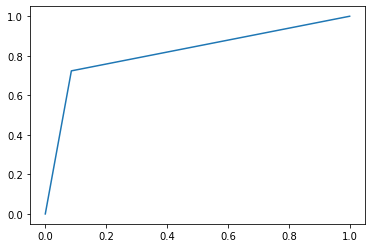

In [78]:
#test
print('Test Accuracy:', accuracy_score(test_y, predictions))
print('F1 score:', f1_score(test_y, predictions))
print('Recall:', recall_score(test_y, predictions))
print('Precision:', precision_score(test_y, predictions))
print('\n confussion matrix:\n',confusion_matrix(test_y, predictions)) 

fpr,tpr,the=roc_curve(test_y, predictions)
plt.plot(fpr,tpr,)

# XG Boost

In [79]:
model = XGBClassifier(max_depth=5,subsample = 0.8 ,n_estimators=10)
model.fit(train_x, train_y)
print(model)
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
print('Accuracy:', accuracy_score(test_y, predictions))
print('F1 score:', f1_score(test_y, predictions))
print('Recall:', recall_score(test_y, predictions))
print('Precision:', precision_score(test_y, predictions))
print('\n confussion matrix:\n',confusion_matrix(test_y, predictions))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 0.950255657368501
F1 score: 0.40984984984984985
Recall: 0.2784396931614167
Precision: 0.7761601455868972

 confussion matrix:
 [[92146   492]
 [ 4421  1706]]


In [80]:
scale_pos_weight = [1,2,3,4,5,6,7,8,9,10]
for i in scale_pos_weight:
    print('scale_pos_weight = {}: '.format(i))
    clf = XGBClassifier(max_depth=10,subsample = 0.8 ,n_estimators=10,scale_pos_weight=i)
    clf.fit(train_x, train_y)
    print("Metrics on train data")
    print('--------------------')
    predict = clf.predict(train_x)
    proba = clf.predict_proba(train_x)
    cm = confusion_matrix(train_y, predict)
    print(accuracy_score(train_y, predict))
    print('Confusion Matrix: \n', cm)
    print('No : %', round(100 * (cm[0][0]/(cm[0][0]+cm[0][1]))))
    print('Yes : %', round(100* (cm[1][1]/(cm[1][0]+cm[1][1]))))
    print('F1 score:', f1_score(train_y, predict))
    
    print("Metrics on test data")
    print('--------------------')
    predict = clf.predict(test_x)
    proba = clf.predict_proba(test_x)
    cm = confusion_matrix(test_y, predict)
    print(accuracy_score(test_y, predict))
    print('Confusion Matrix: \n', cm)
    print('No : %', round(100 * (cm[0][0]/(cm[0][0]+cm[0][1]))))
    print('Yes : %', round(100* (cm[1][1]/(cm[1][0]+cm[1][1]))))
    print('F1 score:', f1_score(test_y, predict))

scale_pos_weight = 1: 
Metrics on train data
--------------------
0.9574306802313983
Confusion Matrix: 
 [[187019   1060]
 [  7476   4965]]
No : % 99.0
Yes : % 40.0
F1 score: 0.537745044947471
Metrics on test data
--------------------
0.9527362932212828
Confusion Matrix: 
 [[91950   688]
 [ 3980  2147]]
No : % 99.0
Yes : % 35.0
F1 score: 0.47913412184780185
scale_pos_weight = 2: 
Metrics on train data
--------------------
0.9565529622980251
Confusion Matrix: 
 [[184913   3166]
 [  5546   6895]]
No : % 98.0
Yes : % 55.0
F1 score: 0.6128344147186916
Metrics on test data
--------------------
0.9500227813496684
Confusion Matrix: 
 [[90782  1856]
 [ 3080  3047]]
No : % 98.0
Yes : % 50.0
F1 score: 0.5524932003626474
scale_pos_weight = 3: 
Metrics on train data
--------------------
0.9487033712347895
Confusion Matrix: 
 [[182000   6079]
 [  4207   8234]]
No : % 97.0
Yes : % 66.0
F1 score: 0.6155341257382073
Metrics on test data
--------------------
0.9415582443173189
Confusion Matrix: 
 [[893

# Upsampling

In [85]:

df_majority = train[train.target==0]
df_minority = train[train.target==1]
print(train[train.target==0].shape)
print(train[train.target==1].shape)
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=220000,    # to match majority class
                                 random_state=13) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.target.value_counts()

(280717, 31)
(18568, 31)


0    280717
1    220000
Name: target, dtype: int64

In [88]:
#
a=list(df_upsampled.select_dtypes(include=['object']).dtypes.index.values)
#cat implies category
for i in a :
    # use pd.concat to join the new columns with your original dataframe
    df_up = pd.concat([df_upsampled,pd.get_dummies(df_upsampled[i], prefix='cat')],axis=1)

    # now drop the original 'country' column (you don't need it anymore)
    df_up.drop([i],axis=1, inplace=True)

In [89]:
z=df_up.select_dtypes(exclude=['object'])
x=z.drop(["target"],axis=1)
y=df_up["target"]

x -= x.mean(axis=0)
x /= x.std(axis=0)

train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.33, random_state=42)

# Random Forest on up sampling


Train_x Shape ::  (335480, 21)
Train_y Shape ::  (335480,)
Test_x Shape ::  (165237, 21)
Test_y Shape ::  (165237,)
Trained model ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Metrics on train data
--------------------
0.9999105758912603
Confusion Matrix: 
 [[188000     30]
 [     0 147450]]
No : % 100.0
Yes : % 100.0
F1 score: 0.9998982809480216
Metrics on test data
--------------------
Accuracy: 0.9809909402857714
F1 score: 0.9788080989360196
Recall: 0.9998345968297726
Precision: 0.958647

Text(0.5, 1.0, 'ROC curve')

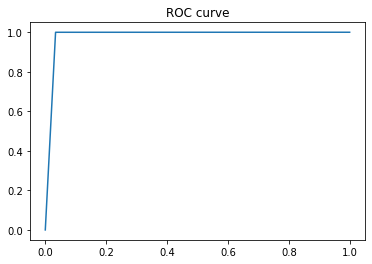

In [90]:

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

# Train and Test dataset size details
print("Train_x Shape :: ", train_x.shape)
print("Train_y Shape :: ", train_y.shape)
print("Test_x Shape :: ", test_x.shape)
print("Test_y Shape :: ", test_y.shape)
 
# Create random forest classifier instance
trained_model = random_forest_classifier(train_x, train_y)
print("Trained model :: ", trained_model)
print("Metrics on train data")
print('--------------------')
predict = trained_model.predict(train_x)
proba = trained_model.predict_proba(train_x)
cm = confusion_matrix(train_y, predict)
print(accuracy_score(train_y, predict))
print('Confusion Matrix: \n', cm)
print('No : %', round(100 * (cm[0][0]/(cm[0][0]+cm[0][1]))))
print('Yes : %', round(100* (cm[1][1]/(cm[1][0]+cm[1][1]))))
print('F1 score:', f1_score(train_y, predict))
print("Metrics on test data")
print('--------------------')

predictions = trained_model.predict(test_x)
print('Accuracy:', accuracy_score(test_y, predictions))
print('F1 score:', f1_score(test_y, predictions))
print('Recall:', recall_score(test_y, predictions))
print('Precision:', precision_score(test_y, predictions))
print('\n confussion matrix:\n',confusion_matrix(test_y, predictions)) 

fpr,tpr,the=roc_curve(test_y, predictions)
plt.plot(fpr,tpr,)
plt.title("ROC curve")